# Fundamentals of Context-Free Grammar

Context-Free Grammars (CFGs) are important in computer science and linguistics for defining language structure. Introduced by Noam Chomsky in the 1950s, they play a key role in programming languages, helping compilers check syntax and convert code into machine instructions. CFGs are also used in natural language processing (NLP) for grammar checking and language translation. Beyond that, they assist in bioinformatics by identifying patterns in DNA sequences and help structure documents in markup languages like XML and HTML. Their "context-free" nature means that rules apply independently of surrounding elements, making them both flexible and efficient for various applications.

This section covers the fundamental concepts of Context-Free Grammar (CFG), including formal definitions, examples, derivations, and parse trees.


## 1. Formal Definition of Context-Free Grammar

A Context-Free Grammar G is formally defined as a 3-tuple $G = (V, \Sigma, R)$ where:

- V: A finite set of variables called non-terminals, including a special start symbol S ($S \in N$)
- An alphabet $\Sigma$: A finite set of symbols called terminals
- R: A finite set of production rules

### 1.1 Key Properties:
- Non-terminals are typically denoted by uppercase letters (A, B, C, ...). These are placeholder symbols that will be replaced using productions. You may think of them as "categories" or "types" of phrases in a language. For example, in a programming language, these might represent concepts like "expression", "statement", or "function".
- Terminals ($\Sigma$) are typically denoted by lowercase letters (a, b, c, ...). These are the actual symbols that appear in the final strings. In a programming language, these would be keywords, operators, and literals. For example: numbers, parentheses, operators like '+' and '/', keywords like 'if' and 'while', etc.
- Production rules are of the form A $\rightarrow$ $\alpha$ where
    - A is a single non-terminal
    - $\alpha$ is a string of non-terminals and terminals (including $\wedge$ for empty string).
    - These productions tell us how to replace non-terminals with combinations of non-terminals and terminals.
    - They define the valid ways to generate strings in the language.
    - Multiple production rules for the same variable are often written as A → $\alpha_1$ | $\alpha_2$ | $\alpha_3$. The vertical bar | means "or": any of these productions can be used
- The start symbol S must appear on the left side of at least one production rule. This is the non-terminal where we begin applying productions. Every valid string in the language must be derivable from this start symbol. You may think of it as the "root" or "entry point" of the grammar.
- The "context-free" property means that a rule can be applied based only on the variable being replaced, without considering what surrounds it (its context). This makes CFGs powerful enough to define most programming language structures while still being easy to parse efficiently.

### 1.2 Code Example:

In [1]:
# Example of implementing a simple CFG validator
class CFG:
    def __init__(self, variables, terminals, productions, start_symbol):
        self.V = set(variables)
        self.Σ = set(terminals)
        self.R = productions
        self.S = start_symbol
        
    def validate(self):
        # Check if start symbol is in variables
        if self.S not in self.V:
            return False, "Start symbol must be in variables"
            
        # Check if all symbols in productions are valid
        for left, rights in self.R.items():
            if left not in self.V:
                return False, f"Left-hand side {left} must be a variable"
            
            for right in rights:
                for symbol in right:
                    if symbol not in self.V and symbol not in self.Σ and symbol != '∧':
                        return False, f"Invalid symbol {symbol} in production"
                        
        return True, "Grammar is valid"

# Example usage
balanced_parens = CFG(
    variables={'S'},
    terminals={'(', ')'},
    productions={'S': ['(S)', 'SS', '∧']},
    start_symbol='S'
)

is_valid, message = balanced_parens.validate()
print(f"Grammar validation: {message}")

Grammar validation: Grammar is valid


## 2. An Example of Context-Free Grammars

### 2.1 Example: Grammar for the language a\*b\*
A Context-Free Grammar G1 is defined as follows:

- $V$ (non-terminals): ${S, A, B}$
- $\Sigma$ (terminals): ${a, b}$
- R (production rules): ${S → AB; A → aA| \wedge , B → bB | \wedge}$

To understand the production rules:
- The start symbol S expands into A followed by B. This enforces that all 'a' symbols, if any, must come before any 'b' symbols.
- A can either produce an 'a' followed by another 'A' (recursion) or terminate with $\wedge$(empty string). This means A generates zero or more 'a' characters (a*).
- B can either produce a 'b' followed by another 'B' (recursion) or terminate with $\wedge$(empty string). This means B generates zero or more 'b' characters (b*).

The language defined by this grammar is: $L(G1)=\{a^nb^m∣n,m≥0\}$. This represents any number of 'a's followed by any number of 'b's, including the empty string. This grammar generates strings like: $\wedge$, a, b, aa, bb, ab, aab, abbb, aaabb, ... 





## 3. Derivations

A derivation is a sequence of strings obtained by applying production rules, starting from the start symbol. There are two main types of derivations:

### 3.1 Leftmost Derivation
In a leftmost derivation, at each step we replace the leftmost non-terminal with one of its productions.  
Example using G1 to derive 'aabb':  

    S ⇒ AB    [using S → AB]  
      ⇒ aAB   [using A → aA] 
      ⇒ aaAB  [using A → aA]
      ⇒ aaB   [using A → ∧]  
      ⇒ aabB  [using B → bB]  
      ⇒ aabbB [using B → bB]
      ⇒ aabb  [using B → ∧]  
      
### 3.2 Rightmost Derivation
In a rightmost derivation, at each step we replace the rightmost non-terminal with one of its productions.  
Example using G1 (a*b*) to derive 'aabb':  (different from leftmost but same result):  

    S ⇒ AB    [using S → AB]  
      ⇒ AbB   [using B → bB] 
      ⇒ AbbB  [using B → bB]
      ⇒ Abb   [using B → ∧]  
      ⇒ aAbb  [using A → aA]  
      ⇒ aaAbb [using A → aA]
      ⇒ aabb  [using A → ∧]  

Different types of derivation help maintain consistency and structure when parsing and analyzing languages. Leftmost derivation is commonly used for top-down parsing such as in Recursive Descent Parser. Rightmost Derivation is commonly used in bottom-up parsing such as in LR parsers. Common programming languages, such as C, Java, Python, are parsed with bottom-up approach.

## 4. More Examples of Context-Free Grammars

### 4.1 Example: Grammar for balanced parentheses
A Context-Free Grammar G2 is defined as follows:

- $V$: {$S$}
- $\Sigma$: {(, )}
- $R: {S → (S) | SS | \wedge}$

Components breakdown:

| Components     | Explanation                                      |
|----------------|--------------------------------------------------|
| V = {S}        | Single non-terminal S                            |
| Σ = {(, )}     | Two terminals: open and close parentheses        |
| R = {S → (S) `\|` SS `\|` ∧} | Three production rules |


This grammar generates strings like:  $\wedge$, (), (()), ()(), ((())) 

### 4.2 Example: Grammar for arithmetic expressions

A Context-Free Grammar G3 is defined as follows:

V: {$S, E, T, F, N, D$}  
$\Sigma$: {$+, -, *, /, (, ), 0, 1, 2, 3, 4, 5, 6, 7, 8, 9$}  
R =  
{
* $S → E$
* $E → E + T | E - T | T $
* $T → T * F | T / F | F $
* $F → (E) | N | -F$
* $N → ND | D$
* $D → 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9$
}      

This grammer defines arithmetic expressions that handles numbers, basic operators (+, -, *, /), and parentheses.

Components breakdown:

| Components | Explanation |
|------------|-------------|
| V = {E, T, F, N, D} | Variables for Expression, Term, Factor, Number, Digit |
| Σ = {0,1,2,3,4,5,6,7,8,9, +, -, *, /, (, )} | Terminals: digits, operators, parentheses |
| R: Production Rules | |
| `S → E` | Start the production |
| `E → E + T \| E - T \| T` | Addition/Subtraction/Term |
| `T → T * F \| T / F \| F` | Multiplication/Division/Factor |
| `F → (E) \| N \| -F` | Number, Parentheses, Negation |
| `N → ND \| D` | Multi-digit Numbers |
| `D → 0 \| 1 \| 2 \| 3 \| 4 \| 5 \| 6 \| 7 \| 8 \| 9` | Single Digits |

This grammar generates expressions like:
- 2
- 3 + 7
- 4 * 5
- (8 + 2) / (3 - 1)
- (-2 + 5) * 3
- 1000 - 245

Sample derivation for '5 + 7 * 2"':  
S ⇒ E + T ⇒ T + T ⇒ F + T ⇒ N + T ⇒ D + T ⇒ 5 + T * F ⇒ 5 + F * F ⇒ 5 + N * N ⇒ 5 + 7 * N ⇒ 5 + 7 * 2


### 4.3 Example: Grammar for simple English sentences
A Context-Free Grammar G4 is defined as follows:

V: {S, NP, VP, Det, N, V}  
Σ: {"a", "cat", "dog", "boy", "girl", "candy", "sees", "eats", "runs"}  
R:  
* $S → NP VP$                  # A sentence consists of a noun phrase and a verb phrase
* $NP → Det N$                 # A noun phrase consists of a determiner and a noun
* $VP → V NP$                  # A verb phrase consists of a verb followed by a noun phrase
* $VP → V$                      # A verb phrase can also be just a verb
* $Det → a$     # Determiners
* $N → cat | dog | apple$  # Nouns
* $V → sees | eats | runs$  # Verbs

Components breakdown:

| Components | Explanation |
|------------|-------------|
| V = {S, NP, VP, Det, N, V} | Non-terminals for Sentence, Noun Phrase, Verb Phrase, Determiner, Noun, and Verb |
| Σ = {"a", "cat", "dog", "boy", "girl", "candy", "sees", "eats", "runs"} | Terminals: Determiners, Nouns, Proper Nouns, Verbs |
| R: Production Rules | |
| S → NP VP | A sentence consists of a noun phrase followed by a verb phrase |
| NP → Det N | A noun phrase consists of a determiner followed by a noun |
| VP → V NP | A verb phrase consists of a verb followed by a noun phrase |
| VP → V | A verb phrase can be just a verb |
| Det → "a" | Determiners |
| N → "cat" \| "dog" \| "boy" \| "girl" \| "candy" | Nouns |
| V → "sees" \| "eats" \| "runs" | Verbs |


This grammar generates sentences like:
- a cat runs
- a boy eats a candy

Example Derivations:
* "a cat sees a dog"  
    S ⇒ NP VP ⇒ Det N VP ⇒ a N VP ⇒ a cat NP ⇒ a cat V NP ⇒ a cat sees NP ⇒ a cat sees Det N ⇒ a cat sees a N ⇒ a cat sees a dog
  
Note that this grammar may derive some nonsensical but valid sentences, such as "a candy sees a girl". In formal language theory, a Context-Free Grammar defines the structure or format of valid strings in a language, regardless of their meaning. A string is considered valid if it can be derived from the start symbol S by applying the production rules of the grammar. A valid sentence such as **a candy runs** follow the correct structure (syntax), but they don't make sense (semantics). The grammar only cares about how the sentence is put together, not whether it has a logical meaning.


### 4.4 Example: Grammar for palindromes

A palindrome is a string that reads the same forward and backward. Here's a context-free grammar for generating palindromes:  

V: {$S$}  
Σ: {$a, b$}  
R: $S → aSa | bSb | a | b | \wedge$  

Components breakdown:

| Components | Explanation |
|------------|-------------|
| V = {S} | Non-terminal for the start symbol, representing the palindrome. |
| Σ = {"a", "b"} | Terminals: the characters used to form the palindrome are "a" and "b". |
| R Production Rules | |
| S → aSa | Generates palindromes where the first and last characters are "a", with a smaller palindrome in between. |
| S → bSb | Generates palindromes where the first and last characters are "b", with a smaller palindrome in between. |
| S → a | A base case where the palindrome consists of just the letter "a". |
| S → b | A base case where the palindrome consists of just the letter "b". |
| S → ε | The empty string, which is also a valid palindrome. |

This grammar generates palindromes like:
- ∧ (empty string)
- a
- b
- abba
- baab
- aabbaa

Example Derivations for 'abba':  
S ⇒ aSa ⇒ abSba ⇒ abba



### 4.5 Example: Grammar for {aⁿbⁿ | n ≥ 0}
The language {aⁿbⁿ | n ≥ 0} consists of strings where there are an equal number of a's followed by b's, with **n** representing the number of a's and b's.

V: {$S$}  
Σ: {$a, b$}  
R: $S → aSb | \wedge$

Components breakdown:

| Components | Explanation |
|------------|-------------|
| V = {S} | Non-terminal for the start symbol, representing the balanced structure of aⁿbⁿ. |
| Σ = {"a", "b"} | Terminals: the characters "a" and "b" used to form the strings in the language. |
| R: Production Rules | Rules that define how strings in the language are generated |
| S → aSb | This rule generates a string with an "a" at the start, a "b" at the end, and recursively generates the middle part of the string (another "a" and "b" pair). |
| S → ∧ | The empty string ∧ is also a valid string in the language, corresponding to n = 0 (no "a" or "b"). |


This grammar generates strings like:
- ∧ (empty string)
- ab
- aabb
- aaabbb

Sample derivation for 'aabb':
S ⇒ aSb ⇒ aaSbb ⇒ aabb

## 5. Parse Trees

A parse tree (or derivation tree) is a graphical representation of a derivation. It shows the hierarchical structure of the derived string.

### 5.1 Properties of Parse Trees:
1. Root is labeled with the start symbol
2. Interior nodes are labeled with non-terminals
3. Leaf nodes are labeled with terminals or ∧ (empty string)
4. If A → X₁X₂...Xₙ is a production used in the derivation, then in the parse tree:  
   - A is the label of an interior node  
   - X₁, X₂, ..., Xₙ are labels of its children from left to right

### 5.2 Example Parse Tree
For the string \"2 + 3\" using grammar G3:  

           S  
           |    
           E  
          /|\    
         E + T  
         |   |  
         T   F  
         |   |  
         F   3  
         |  
         2  
         
### 5.3 Example Python Implementation

In [2]:
# Install required Python packages using pip
import sys
import importlib.util
import subprocess

def install_if_missing(package):
    if importlib.util.find_spec(package) is None:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} has been installed")
    else:
        print(f"{package} is already installed")

required_packages = ['nltk', 'svgling', 'graphviz']
for package in required_packages:
    install_if_missing(package)

nltk is already installed
svgling is already installed
graphviz is already installed



Parse Tree for: 2 + 3


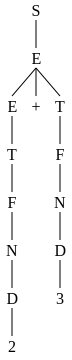


Parse Tree for: 2 + 3 * 4


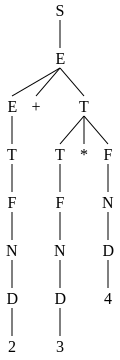


Parse Tree for: ( 5 + 2 ) * 3


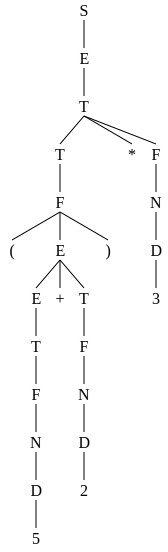


Parse Tree for: - 2 * 3


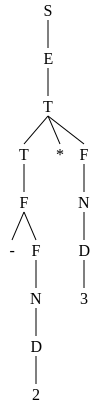


Leftmost Derivation for: 2 + 3 * 4
Step 0: S
Step 1: ⇒ E
Step 2: ⇒ E + T
Step 3: ⇒ T + T
Step 4: ⇒ F + T
Step 5: ⇒ 2 + T
Step 6: ⇒ 2 + T * F
Step 7: ⇒ 2 + F * F
Step 8: ⇒ 2 + 3 * F
Step 9: ⇒ 2 + 3 * 4


In [3]:
# Example to visualize parse tree and show derivation process for CFG G3
import nltk
from nltk import CFG
from IPython.display import display
from nltk.tree import Tree

# Try importing svgling for tree visualization
try:
    from svgling import draw_tree
    SVG_AVAILABLE = True
except ImportError:
    SVG_AVAILABLE = False
    print("Warning: 'svgling' module not found. Install it using 'pip install svgling' for better tree visualization.")
    
# Define arithmetic expression grammar
grammar = CFG.fromstring("""
    S -> E
    E -> E '+' T | E '-' T | T
    T -> T '*' F | T '/' F | F
    F -> '(' E ')' | N | '-' F
    N -> N D | D
    D -> '0' | '1' | '2' | '3' | '4' | '5' | '6' | '7' | '8' | '9'
""")

# Create parser
parser = nltk.ChartParser(grammar)

# Example expressions
expressions = [
    ['2', '+', '3'],
    ['2', '+', '3', '*', '4'],
    ['(', '5', '+', '2', ')', '*', '3'],
    ['-', '2', '*', '3']
]

# Parse and display trees
for expr in expressions:
    print(f"\nParse Tree for: {' '.join(expr)}")
    try:
        for tree in parser.parse(expr):
            if SVG_AVAILABLE:
                display(draw_tree(tree))
    except ValueError as e:
        print(f"Error parsing expression: {e}")

# Function to show derivation steps for an expression
def show_leftmost_derivation(expression):
    print(f"\nLeftmost Derivation for: {' '.join(expression)}")
    steps = [
        "S",
        "⇒ E",
        "⇒ E + T",
        "⇒ T + T",
        "⇒ F + T",
        "⇒ 2 + T",
        "⇒ 2 + T * F",
        "⇒ 2 + F * F",
        "⇒ 2 + 3 * F",
        "⇒ 2 + 3 * 4"
    ]
    for i, step in enumerate(steps):
        print(f"Step {i}: {step}")

# Example usage
show_leftmost_derivation(['2', '+', '3', '*', '4'])

Defined Context-Free Grammar:
Grammar with 9 productions (start state = S)
    S -> NP VP
    NP -> Det N
    VP -> V NP
    Det -> 'a'
    Det -> 'the'
    N -> 'cat'
    N -> 'dog'
    V -> 'chases'
    V -> 'sees'

Leftmost Derivation for 'the cat sees a dog':
S
⇒ NP VP
⇒ Det N VP
⇒ the N VP
⇒ the cat VP
⇒ the cat V NP
⇒ the cat sees NP
⇒ the cat sees Det N
⇒ 'the' cat sees 'a' N
⇒ 'the' cat sees 'a' dog

Rightmost Derivation for 'the cat sees a dog':
S
⇒ NP VP
⇒ NP V NP
⇒ NP V Det N
⇒ NP V Det dog
⇒ NP V a dog
⇒ NP sees a dog
⇒ Det N sees a dog
⇒ Det cat sees a dog
⇒ the cat sees a dog

Parse Tree:


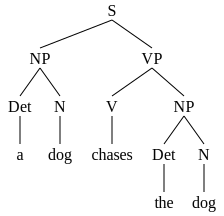

In [4]:
# Example to visualize parse tree and show derivation process for CFG G4
import nltk
from nltk import CFG
from IPython.display import display
from nltk.tree import Tree

# Try importing svgling for tree visualization
try:
    from svgling import draw_tree
    SVG_AVAILABLE = True
except ImportError:
    SVG_AVAILABLE = False
    print("Warning: 'svgling' module not found. Install it using 'pip install svgling' for better tree visualization.")

# Define a simple Context-Free Grammar (CFG)
grammar = CFG.fromstring("""
    S -> NP VP
    NP ->  Det N
    VP -> V NP
    Det -> 'a' | 'the'
    N -> 'cat' | 'dog'
    V -> 'chases' | 'sees'
""")

# Display the grammar
print("Defined Context-Free Grammar:")
print(grammar)

# Example of Leftmost and Rightmost Derivations
def leftmost_derivation():
    print("\nLeftmost Derivation for 'the cat sees a dog':")
    print("S")
    print("⇒ NP VP")
    print("⇒ Det N VP")
    print("⇒ the N VP")
    print("⇒ the cat VP")
    print("⇒ the cat V NP")
    print("⇒ the cat sees NP")
    print("⇒ the cat sees Det N")
    print("⇒ 'the' cat sees 'a' N")
    print("⇒ 'the' cat sees 'a' dog")

def rightmost_derivation():
    print("\nRightmost Derivation for 'the cat sees a dog':")
    print("S")
    print("⇒ NP VP")
    print("⇒ NP V NP")
    print("⇒ NP V Det N")
    print("⇒ NP V Det dog")
    print("⇒ NP V a dog")
    print("⇒ NP sees a dog")
    print("⇒ Det N sees a dog")
    print("⇒ Det cat sees a dog")
    print("⇒ the cat sees a dog")

leftmost_derivation()
rightmost_derivation()

# Parse tree generation
parser = nltk.ChartParser(grammar)
# sentence = ['the', 'cat', 'sees', 'a', 'dog']
sentence = ['a', 'dog', 'chases', 'the', 'dog']


print("\nParse Tree:")
for tree in parser.parse(sentence):
    # display(tree)
   #  tree.pretty_print()
    if SVG_AVAILABLE:
        display(draw_tree(tree))


## 6. Practice Exercises

### 6.1 Exercise 1: Definition of CFG
For each of the following languages, identify V, Σ, R. Then give three strings that belong to the language generated by the grammar.

* Language 1: a language that contains strings with one or more x's followed by one or more y's. 
* Language 2: a language that contains strings of the form 0ⁿ1ⁿ where n ≥ 1. 

### 6.2 Exercise 2: Derivations

* Using the English sentence grammar G4 from Example 4:
   - give a complete derivation for "a girl sees a cat"
   - print the parse tree for this derivation
   - provide two more valid sentences that can be generated by this grammar.
* For the grammar G = ({S}, {a, b}, {S → aSb | SS | ∧}): 
   - Give a leftmost derivation for "aabb"
   - Give a rightmost derivation for "aabb"
   - Are these derivations unique? If not, find another derivation for the same string
   - Draw the parse tree(s) for your derivation(s)

### 6.3 Exercise 3:

* Implement the CFG class from the notebook with additional methods:
   - `def is_valid_string(self, input_string)`: Implement a method to check if a given string can be generated by this grammar
   - `def generate_strings(self, max_length)`: Implement a method to generate all strings up to length max_length


## 7. Further Reading

* "Introduction to the Theory of Computation" by Michael Sipser, Section 2.1 - Context-Free Grammars
* "Introduction to Computer Theory" by Daniel I.A. Cohen, Chapter 12 - Context-Free Grammars
* "Automata Theory, Languages, and Computation" by Hopcroft, Motwani, and Ullman, Chapter 5 - Context-Free Grammars
